# Question 1

### 1.1 Plot an histogram of the balance amount for all the customers.

In [382]:
# Importamos las librerías
# Here I only import the libraries for exploratory analysis of the dataframe
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [212]:
# I read the dataset and store it in a variable called "stori"
# The dataset that I previously loaded I normalized in excel and 
# I took the liberty of doing it since its volume is manageable
stori = pd.read_csv('/Users/acrhonoz./Desktop/SQLite/stori_2021.csv')

In [215]:
stori.head(2)

,cust_id,cust_id.1,year_activated,month_activated,activated_date,activated_date.1,year_last_payment,month_last_payment,last_payment_date,last_payment_date.1,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,10001,C10001,2019,10,20191006,06/10/2019,2020,09,20200909,09/09/2020,...,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,10002,C10002,2019,10,20191006,06/10/2019,2020,07,20200704,04/07/2020,...,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0


In [217]:
# Obtenemos la información general del dataframe
# I get the general information of the dataset variables
stori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   int64  
 1   cust_id.1                         8950 non-null   object 
 2   year_activated                    8950 non-null   object 
 3   month_activated                   8950 non-null   object 
 4   activated_date                    8950 non-null   object 
 5   activated_date.1                  8950 non-null   object 
 6   year_last_payment                 8950 non-null   object 
 7   month_last_payment                8950 non-null   object 
 8   last_payment_date                 8950 non-null   object 
 9   last_payment_date.1               8950 non-null   object 
 10  balance                           8950 non-null   float64
 11  balance_frequency                 8950 non-null   float64
 12  purcha

In [236]:
# Filtramos para mostrar los regitros que tienen un balances > 0
# We sign to bring those balances that are greater than 0
balance_mayor_0 = stori.balance > 0
stori_balance = stori[balance_mayor_0]

In [237]:
stori_balance.shape

(8868, 28)

In [243]:
# Para obtener el histograma se agrupa por cust_id y se suma por el campo balance para cada cliente
# To obtain the histogram, it is grouped by cust_id and added by the balance field for each customer
his_balance = pd.DataFrame(stori_balance.groupby(['cust_id.1'])['balance'].sum())

In [244]:
his_balance

,balance
cust_id.1,
C10001,40.900749
C10002,3202.467416
C10003,2495.148862
C10004,1666.670542
C10005,817.714335
...,...
C19186,28.493517
C19187,19.183215
C19188,23.398673


In [245]:
# Transformamos el campo "balance" a una lista 
# We transform the field "balance" to a list
balances = his_balance['balance'].tolist()

In [246]:
max(balances), min(balances)

(19043.13856, 0.000199)

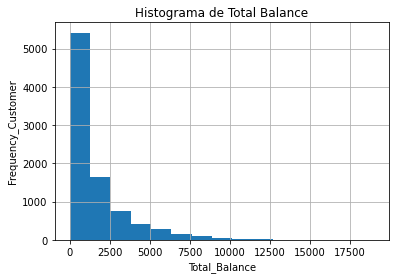

<Figure size 432x288 with 0 Axes>

In [257]:
# Graficamos el Histograma
# We plot the Histogram
plt.hist(balances, bins = 15)
plt.xlabel("Total_Balance")
plt.ylabel("Frequency_Customer")
plt.title("Histograma de Total Balance")
plt.grid(True)
plt.show()
plt.clf()

### 1.2 Report any structure you find and any hypotheses you have about that structure.

Supongamos que con "estructura" se refiere al tipo de de base de datos que se tiene. Si éste es el caso, la base de datos se normalizó en excel, se quitaron valores nulos en campos string, se rellenaron valores vacíos en campos numéricos y string, y se trataron los campos de fecha, para tenerlas en orden sin caracteres especiales, así mismo se garegaron campos de extracción del mes y el año de las fechas.  

Suppose that with "structure" you mean the type of database you have. If this is the case, the database was normalized in excel, null values ​​were removed in string fields, empty values ​​were filled in numeric and string fields, and the date fields were treated, to have them in order without special characters, like this The same extraction fields for the month and year of the dates were provided.

### Report mean and median balance, grouped by year and month of ​activated_date.​

In [260]:
# Filtramos el campo "year_activated" para que muestre registros conocidos
# We filter the "year_activated" field to show known records
no_desco = stori_balance['year_activated'] != 'Desconocido' 

In [261]:
# aplicamos el filtro a el dataset
# we apply the filter to the dataset
stori_balance_sin_des = stori_balance[no_desco]

In [269]:
# Creamos la tabla consolidada de año de activación y mes de activacio del balance promedio
# We create the consolidated table of the year of activation and month of activation of the mean balance
avg_balance = pd.DataFrame(stori_balance_sin_des.groupby(['year_activated', 'month_activated'])['balance'].mean())

In [273]:
avg_balance

balance
year_activated month_activated             
2019           10               2491.473251
               11               1858.444598
               12               2032.873479
2020           01               1867.166099
               02               1759.627448
               03               1571.911727
               04               1498.473739
               05               1226.174473
               06                956.412396
               07                657.385963

In [275]:
# Creamos la tabla consolidad del año de activación y mes de activación de la media
# We create the consolidation table of the year of activation and month of activation of the median
median_balance = pd.DataFrame(stori_balance_sin_des.groupby(['year_activated', 'month_activated'])['balance'].median())

In [276]:
median_balance

balance
year_activated month_activated             
2019           10               1527.539238
               11               1094.221693
               12               1177.946847
2020           01               1182.045732
               02               1005.204051
               03                862.942005
               04                927.294609
               05                748.352082
               06                489.488586
               07                226.723822

# Question 2

### 2.1 Report in a table the following information for customers who activated their account and made their last payment during 2020: cust_id (excluding letters), activated_date (in format YYYY-MM), last_payment_date (in format YYYY-MM-DD), cash_advance, credit_limit, and a calculated field of cash_advance as a percentage of credit_limit.
 

In [277]:
stori_balance_sin_des.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8855 entries, 0 to 8949
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8855 non-null   int64  
 1   cust_id.1                         8855 non-null   object 
 2   year_activated                    8855 non-null   object 
 3   month_activated                   8855 non-null   object 
 4   activated_date                    8855 non-null   object 
 5   activated_date.1                  8855 non-null   object 
 6   year_last_payment                 8855 non-null   object 
 7   month_last_payment                8855 non-null   object 
 8   last_payment_date                 8855 non-null   object 
 9   last_payment_date.1               8855 non-null   object 
 10  balance                           8855 non-null   float64
 11  balance_frequency                 8855 non-null   float64
 12  purcha

In [278]:
stori_balance_sin_des.head()

,cust_id,cust_id.1,year_activated,month_activated,activated_date,activated_date.1,year_last_payment,month_last_payment,last_payment_date,last_payment_date.1,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,10001,C10001,2019,10,20191006,06/10/2019,2020,09,20200909,09/09/2020,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,10002,C10002,2019,10,20191006,06/10/2019,2020,07,20200704,04/07/2020,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,10003,C10003,2019,10,20191006,06/10/2019,2020,09,20200917,17/09/2020,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,10004,C10004,2019,10,20191006,06/10/2019,2020,08,20200824,24/08/2020,...,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,0
4,10005,C10005,2019,10,20191006,06/10/2019,2020,10,20201020,20/10/2020,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [288]:
# Creamos una copia del dataset con el que se trabajó originalmente para no modificarlo
# We create a copy of the dataset with which it was originally worked so as not to modify it
stori_balance_new = stori_balance_sin_des.copy(deep = True)

In [289]:
# Creamos un nuevo campo en la copia del dataset llamado "activated_date" con el formato pedido en el ejercicio
# We create a new field in the copy of the dataset called "activated_date" with the format requested in the exercise
stori_balance_new['activated_date_f'] = stori_balance_new['year_activated'] + "-" + stori_balance_new['month_activated']

In [290]:
stori_balance_new

,cust_id,cust_id.1,year_activated,month_activated,activated_date,activated_date.1,year_last_payment,month_last_payment,last_payment_date,last_payment_date.1,...,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud,activated_date_f
0,10001,C10001,2019,10,20191006,06/10/2019,2020,09,20200909,09/09/2020,...,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,2019-10
1,10002,C10002,2019,10,20191006,06/10/2019,2020,07,20200704,04/07/2020,...,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,2019-10
2,10003,C10003,2019,10,20191006,06/10/2019,2020,09,20200917,17/09/2020,...,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,2019-10
3,10004,C10004,2019,10,20191006,06/10/2019,2020,08,20200824,24/08/2020,...,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,0,2019-10
4,10005,C10005,2019,10,20191006,06/10/2019,2020,10,20201020,20/10/2020,...,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,2019-10


In [291]:
# Separamos los componentes de la fecha del campo "last_payment_date" para poder construir el formato pedido
# We separate the date components from the "last_payment_date" field in order to build the requested format
new = stori_balance_new["last_payment_date.1"].str.split("/", n = 1, expand = True)

In [292]:
new

,0,1
0,09,09/2020
1,04,07/2020
2,17,09/2020
3,24,08/2020
4,20,10/2020
...,...,...
8945,03,11/2020
8946,06,09/2020
8947,03,06/2020
8948,19,07/2020


In [294]:
# una vez mas
# one more time
new2 = new[1].str.split("/", n=1, expand = True)

In [295]:
new2

,0,1
0,09,2020
1,07,2020
2,09,2020
3,08,2020
4,10,2020
...,...,...
8945,11,2020
8946,09,2020
8947,06,2020
8948,07,2020


In [300]:
# Creamos el formato pedido para el campo "last_payment_date_f"
# We create the requested format for the field "last_payment_date_f"
new2['last_payment_date_f'] = new2[1] + "-" + new2[0] + "-" + new[0]

In [301]:
new2

,0,1,last_payment_date_f
0,09,2020,2020-09-09
1,07,2020,2020-07-04
2,09,2020,2020-09-17
3,08,2020,2020-08-24
4,10,2020,2020-10-20
...,...,...,...
8945,11,2020,2020-11-03
8946,09,2020,2020-09-06
8947,06,2020,2020-06-03
8948,07,2020,2020-07-19


In [302]:
# Agregamos el campo deseado al dataframe copia
# Add the desired field to the copy dataframe
stori_balance_new['last_payment_date_f'] = new2['last_payment_date_f']

In [303]:
stori_balance_new.head()

,cust_id,cust_id.1,year_activated,month_activated,activated_date,activated_date.1,year_last_payment,month_last_payment,last_payment_date,last_payment_date.1,...,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud,activated_date_f,last_payment_date_f
0,10001,C10001,2019,10,20191006,06/10/2019,2020,09,20200909,09/09/2020,...,0,2,1000.0,201.802084,139.509787,0.000000,12,0,2019-10,2020-09-09
1,10002,C10002,2019,10,20191006,06/10/2019,2020,07,20200704,04/07/2020,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,2019-10,2020-07-04
2,10003,C10003,2019,10,20191006,06/10/2019,2020,09,20200917,17/09/2020,...,0,12,7500.0,622.066742,627.284787,0.000000,12,0,2019-10,2020-09-17
3,10004,C10004,2019,10,20191006,06/10/2019,2020,08,20200824,24/08/2020,...,1,1,7500.0,0.000000,0.000000,0.000000,12,0,2019-10,2020-08-24
4,10005,C10005,2019,10,20191006,06/10/2019,2020,10,20201020,20/10/2020,...,0,1,1200.0,678.334763,244.791237,0.000000,12,0,2019-10,2020-10-20


In [385]:
# Creamos los campos necesarios para mostrarl el layout final
# We create the necessary fields to show the final layout
campos_filtros = ['cust_id','activated_date_f','last_payment_date_f','cash_advance','credit_limit']

In [386]:
# Aplicamos los filstros y en este punto se supuso que los clientes habían activado en 2020 asi como que su pago fue
# en el mismo año, eso se entiende del ejercicios
# We apply the filters and at this point it was assumed that the clients had activated in 2020 as well as that their payment was
# in the same year, that is understood from the exercises
filas_filtradas = (stori_balance_new['year_activated'] == '2020') & (stori_balance_new['year_last_payment'] == '2020')

In [387]:
# Creamos el dataset con los campos necesarios
# We create the dataset with the necessary fields
stori_2020 = stori_balance_new[filas_filtradas]

In [388]:
stori_2020.shape

(6233, 30)

In [389]:
# Creamos el dataset que muestra el layout final con los formatos requeridos
# We create the dataset that shows the final layout with the required formats
layout = stori_2020[campos_filtros]

In [390]:
# Creamos el campo calculado de % de cash advance con respecto al limite de credito y lo agregamos al layout final
# We create the calculated field of% of cash advance with respect to the credit limit and add it to the final layout
layout['%cash_advance'] = (layout['cash_advance']/layout['credit_limit'])* 100

In [391]:
# Mostramos el layout final como se prequirió
# We show the final layout as required
layout.head()

,cust_id,activated_date_f,last_payment_date_f,cash_advance,credit_limit,%cash_advance
2633,12709,2020-01,2020-05-08,2431.292076,8000.0,30.391151
2634,12710,2020-01,2020-05-26,0.000000,2000.0,0.000000
2635,12712,2020-01,2020-10-20,0.000000,3000.0,0.000000
2636,12713,2020-01,2020-08-22,0.000000,9000.0,0.000000
2637,12714,2020-01,2020-04-26,78.763096,1500.0,5.250873


# Question 3 

## 3.1 Build a predictive model for fraud.

In [325]:
# Para crear el modelo se partió del supuesto de que la columna "fraud" del dataset eran las etiquetas, pues solo 
# tienen valores de 0 y 1, interpretando que 0 = no fraude, 1 = fraude
# To create the model, it was assumed that the "fraud" column of the dataset were the labels, since only
# have values of 0 and 1, interpreting that 0 = no fraud, 1 = fraud
# Obtenemos un conteo de registros con y sin fraude
# We obtain a record count with and without fraud
stori_balance_sin_des.groupby('fraud').size()

fraud
0    8785
1      70
dtype: int64

In [329]:
stori_balance_sin_des.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8855 entries, 0 to 8949
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8855 non-null   int64  
 1   cust_id.1                         8855 non-null   object 
 2   year_activated                    8855 non-null   object 
 3   month_activated                   8855 non-null   object 
 4   activated_date                    8855 non-null   object 
 5   activated_date.1                  8855 non-null   object 
 6   year_last_payment                 8855 non-null   object 
 7   month_last_payment                8855 non-null   object 
 8   last_payment_date                 8855 non-null   object 
 9   last_payment_date.1               8855 non-null   object 
 10  balance                           8855 non-null   float64
 11  balance_frequency                 8855 non-null   float64
 12  purcha

In [328]:
# Tomamos todas las variables numéricas como variables predictoras, excluyendo las variables de fechas 
# We take all numeric variables as predictor variables, excluding date variables
predictores = ['balance','balance_frequency','purchases','oneoff_purchases','installments_purchases',
                      'cash_advance','purchases_frequency','oneoff_purchases_frequency','purchases_installments_frequency',
              'cash_advance_frequency','cash_advance_trx','credit_limit', 'payments','minimum_payments',
               'prc_full_payment','tenure']

In [330]:
# Tomamos el campo "fraud" como variable a predecir
# We take the "fraud" field as a variable to predict
etiquetas = ['fraud']

In [334]:
# Creamos una matriz de correlación con un mapa de calor para observar la correlación entre todas las variables
# We create a correlation matrix with a heat map to observe the correlation between all the variables
mat_corr = stori_balance_sin_des[predictores].corr()

In [333]:
# Importamos la librería seaborn para mostrar el mapa de calor
# We import the seaborn library to show the heat map
import seaborn as sns

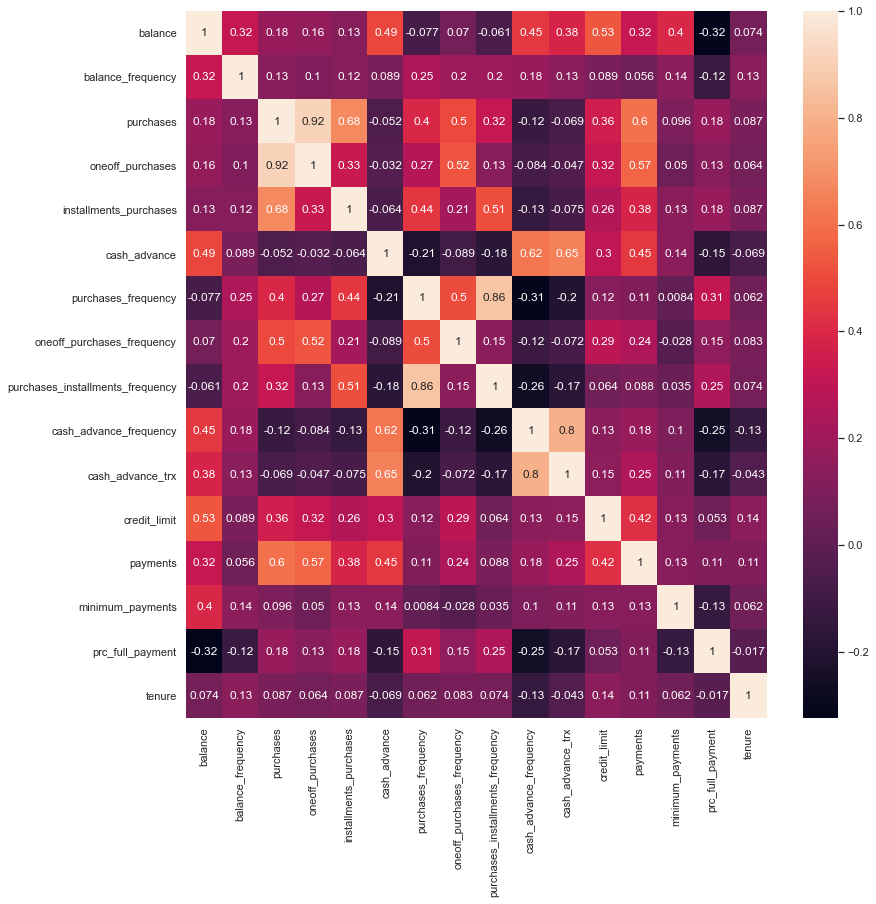

In [348]:
# Configuramos la imagen de la matriz de correlación junto con el mapa de calor
# We configure the image of the correlation matrix together with the heat map
sns.set(rc = {'figure.figsize':(13,13)})
sns.heatmap(mat_corr, annot = True)

In [359]:
# Importamos las librerías necesarias para crear el modelo
# We import the necessary libraries to create the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [363]:
# Numero de observaciones por clase
# Estamos suponiendo que la etiqueta 0 significa que no hay fraude y que la etiqueta 1 que si lo hay
# Number of observations per class
# We are assuming that tag 0 means that there is no fraud and that tag 1 that there is
print("Número de observaciones por clase")
print(stori_balance_sin_des['fraud'].value_counts())
print("")
print("Porcentaje de observaciones por clase")
print(100 * stori_balance_sin_des['fraud'].value_counts(normalize=True))

Número de observaciones por clase
0    8785
1      70
Name: fraud, dtype: int64

Porcentaje de observaciones por clase
0    99.209486
1     0.790514
Name: fraud, dtype: float64


In [365]:
#Separo todos los datos con las caracteristicas y etiquetas o resultados
#Separate all the data with the features and labels or results
X = stori_balance_sin_des[predictores] # features
y = stori_balance_sin_des[etiquetas] # Labels

In [367]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
#Separate the "train" data in training and testing to test the algorithms
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 7084 datos para entrenamiento y 1771 datos para prueba


In [368]:
# Con los ingredientes necesarios creo el modelo de Regresión Logística
# With the necessary ingredients I create the Logistic Regression model
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Regresión Logística: {} %'.format(algoritmo.score(X_train, y_train)*100))

Precisión Regresión Logística: 99.6470920383964 %


#### El modelo tiene una precisión de 99.65% cuyo valor es mayor al valor de la clase de clientes que no hicieron fraude de un 99.21% por lo que a priori podemos interpretar que el modelo funciona correctamente
#### The model has an accuracy of 99.65% whose value is greater than the value of the class of clients that did not make fraud of 99.21% so that a priori we can interpret that the model works correctly

In [378]:
# Hagamos una comprobaciones del modelo: importamos la librerías necesarias
# Let's do a model check: we import the necessary libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import accuracy_score

In [370]:
# Creación del modelo utilizando matrices como en scikitlearn
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
# Creation of the model using matrices as in scikitlearn
# A column of 1s must be added to the matrix of predictors for the intercept of the model
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

         Current function value: 0.014827
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:                 7084
Model:                          Logit   Df Residuals:                     7067
Method:                           MLE   Df Model:                           16
Date:                Wed, 20 Oct 2021   Pseudo R-squ.:                  0.6878
Time:                        21:00:48   Log-Likelihood:                -105.03
converged:                      False   LL-Null:                       -336.46
Covariance Type:            nonrobust   LLR p-value:                 2.260e-88
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -8.1534      3.141     -2.596      0.009     -14.310      -1.997

In [372]:
# Predicciones con intervalo de confianza 
# Predictions with confidence interval
predicciones = modelo.predict(exog = X_train)
# Clasificación predicha
# Predicted ranking
clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion

array([0, 0, 0, ..., 0, 0, 0])

In [379]:
# Accuracy de test del modelo 
# Model Test Accuracy
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(y_true = y_test, y_pred = clasificacion, normalize = True)
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 99.66120835686053%


In [381]:
# Matriz de confusión de las predicciones de test
# Confusion matrix of test predictions
confusion_matrix = pd.crosstab(
    y_test.values.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,1758,1
1,5,7


## 3.2 What explanatory variable was the most powerful predictor for fraud?

In [355]:
# Importancia de las características
# Importance of features
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': algoritmo.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

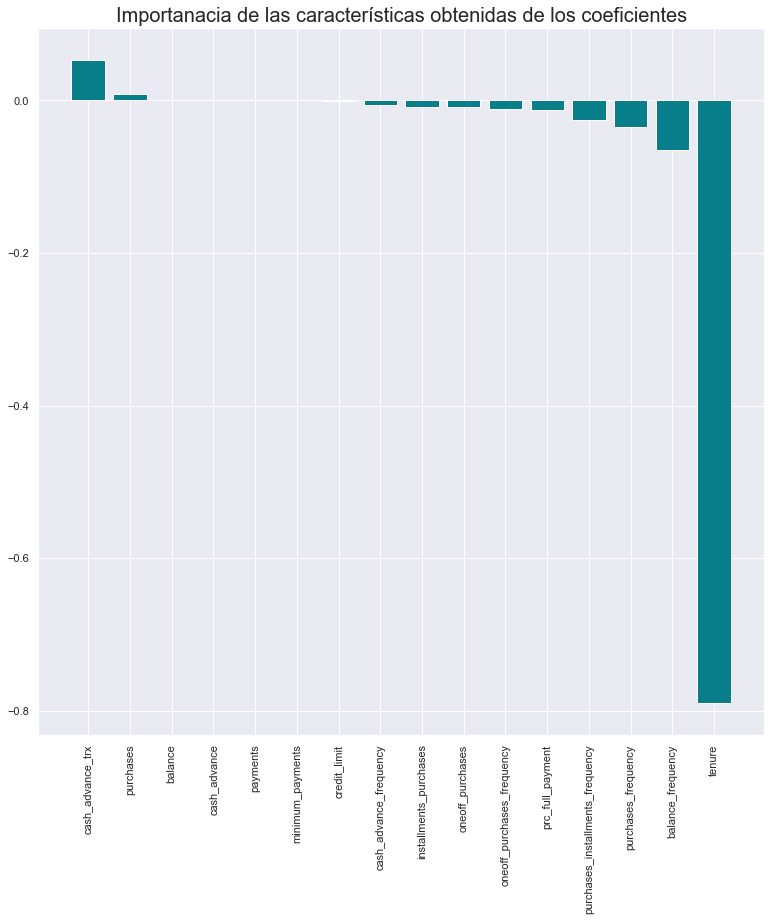

In [358]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Importanacia de las características obtenidas de los coeficientes', size=20)
plt.xticks(rotation='vertical')
plt.show()

## BIBLIOGRAPHY

Some part of the code and concepts were referenced, adapted and influenced by the authors that I quote below.
* https://www.cienciadedatos.net/documentos/py17-regresion-logistica-python.html
* https://aprendeia.com/machine-learning-clasificador-flor-iris-python/
* https://likegeeks.com/es/matrix-correlacion-python/